# Biblioteki

Zaimportowanie wymaganych pakietów i bibliotek.

In [ ]:
import time
import numpy as np
import pandas as pd
import warnings
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

# Dane

Załadowanie danych.

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data', header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


Wybór 10 liter

In [ ]:
df_select = df[df[0].isin(["A","G","H","C","I","S","K","W","T","P"])]
df_select.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [ ]:
df_select.replace("A", 0, inplace=True)
df_select.replace("G", 1, inplace=True)
df_select.replace("H", 2, inplace=True)
df_select.replace("C", 3, inplace=True)
df_select.replace("I", 4, inplace=True)
df_select.replace("S", 5, inplace=True)
df_select.replace("K", 6, inplace=True)
df_select.replace("W", 7, inplace=True)
df_select.replace("T", 8, inplace=True)
df_select.replace("P", 9, inplace=True)
df_select.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
19994,8,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19996,3,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,8,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,5,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,0,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [ ]:
X = df_select.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
y = df_select.iloc[:, 0].values

print(X.shape, X.size)
print(y.shape, y.size)

(7625, 16) 122000
(7625,) 7625


# Wizualizacja oryginalnych danych

Rysowanie wykresu 2D dla wizualizacji oryginalnych danych

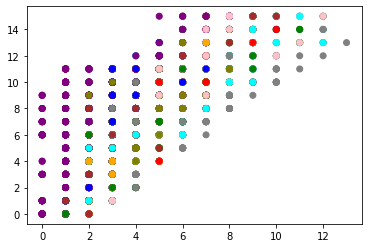

In [ ]:
labels = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

colors = []
for item in y:
    colors.append(labels[item])

plt.scatter(X[:,0], X[:, 1], color=colors)
plt.show()

# Deklaracje funkcji

Wykresy

In [ ]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    warnings.filterwarnings("ignore", category=FutureWarning)

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v', '+', '8', 'D', '*', 'h')
    colors = ('blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=np.array([cmap(idx)]),
                    marker=markers[idx], label=cl)

    # zaznacza próbki testowe 
    if test_idx:
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Zaktualizuj bibliotekę NumPy do wersji 1.9.0 lub nowszej')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    edgecolors='k',
                    s=80, label='Zestaw testowy')

Implementacja funkcji do tworzenia zbioru treningowego i testowego.

In [ ]:
def prepareData(ratio, Samples, Classes):

    train_size = int(ratio * Samples.shape[0])
    test_size = Samples.shape[0] - train_size

    indices = np.random.permutation(Samples.shape[0])
    
    training_idx, test_idx = indices[:train_size], indices[train_size:]
    training, test = Samples[training_idx,:], Samples[test_idx,:]
    training_classes, test_classes = Classes[training_idx,], Classes[test_idx,]
    
    return (training, training_classes, test, test_classes)

PCA

In [ ]:
def RunPCA(X, reduction):

    pca = PCA(n_components=16)
    pca.fit(X) 

    reduced_X = pca.transform(X)[:, :reduction]

    rX = reduced_X[:]
    return (rX, pca, reduced_X)

Metody

In [ ]:
def RunMethod(clf, date):
  
    training, training_classes, test, test_classes = date
    
    clf.fit(training, training_classes)

    Pred = clf.predict(test)
    accuracy = metrics.accuracy_score(test_classes, Pred)
    
    return (accuracy, clf)

OneVsOne

In [ ]:
def RunOvO(clf, date):
    
    training, training_classes, test, test_classes = date
    
    ovo = OneVsOneClassifier(clf)

    ovo.fit(training, training_classes)
    
    Pred_OvO = ovo.predict(test)
    accuracy_OvO  = metrics.accuracy_score(test_classes, Pred_OvO)
    
    return (accuracy_OvO, clf)

OneVsRest

In [ ]:
def RunOvR(clf, date):
    
    training, training_classes, test, test_classes = date

    ovr = OneVsRestClassifier(clf)

    ovr.fit(training, training_classes)
    
    Pred_OvR = ovr.predict(test)
    accuracy_OvR = metrics.accuracy_score(test_classes, Pred_OvR)
    
    return (accuracy_OvR, clf)

Keras MLP

In [ ]:
from keras import models, layers
from tensorflow.keras.utils import to_categorical
def RunMLPDense1(layer, optimizer, activation, date):
    
    training, training_classes, test, test_classes = date

    MLP = models.Sequential()
    MLP.add(layers.Dense(layer, activation=activation))
    MLP.add(layers.Dense(10, activation = 'softmax'))

    MLP.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    train_cat = to_categorical(training_classes[:])
    test_cat = to_categorical(test_classes[:])

    MLP_ = MLP.fit(training, train_cat, epochs=10)
    test_loss, test_acc = MLP.evaluate(test, test_cat)
    print('test_acc', test_acc)
    
    Pred_MLP = MLP.predict(test)
    return (test_acc, MLP)
    

def RunMLPDense2(layer, optimizer, activation, date):
    
    training, training_classes, test, test_classes = date

    MLP = models.Sequential()
    MLP.add(layers.Dense(layer, activation=activation))
    MLP.add(layers.Dense(layer, activation=activation))
    MLP.add(layers.Dense(10, activation = 'softmax'))

    MLP.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    train_cat = to_categorical(training_classes[:])
    test_cat = to_categorical(test_classes[:])

    MLP_ = MLP.fit(training, train_cat, epochs=10)
    test_loss, test_acc = MLP.evaluate(test, test_cat)
    print('test_acc', test_acc)
    
    Pred_MLP = MLP.predict(test)
    return (test_acc, MLP)

def RunMLPDense3(layer, optimizer, activation, date):
    
    training, training_classes, test, test_classes = date

    MLP = models.Sequential()
    MLP.add(layers.Dense(layer, activation=activation))
    MLP.add(layers.Dense(layer, activation=activation))
    MLP.add(layers.Dense(layer, activation=activation))
    MLP.add(layers.Dense(10, activation = 'softmax'))

    MLP.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    train_cat = to_categorical(training_classes[:])
    test_cat = to_categorical(test_classes[:])

    MLP_ = MLP.fit(training, train_cat, epochs=10)
    test_loss, test_acc = MLP.evaluate(test, test_cat)
    print('test_acc', test_acc)
    
    Pred_MLP = MLP.predict(test)
    return (test_acc, MLP)

# Najlepsze KNN

Wybór najlepszego KNN dla stategii OvO

In [ ]:
# metric: “euclidean”, “manhattan”, “chebyshev”, “minkowski”
accuracy_avgsKNN_OvO_OvR = list()
accuracy_avgsKNN_OvO = list()
accuracy_avgsKNN_OvO1 = list()
accuracy_avgsKNN_OvO2 = list()
accuracy_avgsKNN_OvO3 = list()
accuracy_avgsKNN_OvO4 = list()


acc = [3,9,13,29,31,37,41]
for num_neighbors_OvO1 in acc:
    accuracy_avgKNN_OvO1 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvO1 = neighbors.KNeighborsClassifier(num_neighbors_OvO1, metric='euclidean') 
        KNN_OvO1 = RunOvO(clf_KNN_OvO1, Data)
        end_time = time.time()
        accuracyKNN_OvO1, knn_OvO1 = KNN_OvO1
        
        accuracy_avgKNN_OvO1 += accuracyKNN_OvO1/2.0
        tim = end_time - start_time
    
    p = 0
    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvO1, accuracy_avgKNN_OvO1, 'euclidean', tim, 'OvO', p))
    accuracy_avgsKNN_OvO.append((num_neighbors_OvO1, accuracy_avgKNN_OvO1, 'euclidean', tim, 'OvO', p))
    accuracy_avgsKNN_OvO1.append((num_neighbors_OvO1, accuracy_avgKNN_OvO1, 'euclidean', tim, 'OvO', p))


for num_neighbors_OvO2 in acc:
    accuracy_avgKNN_OvO2 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvO2 = neighbors.KNeighborsClassifier(num_neighbors_OvO2, metric='manhattan') 
        KNN_OvO2 = RunOvO(clf_KNN_OvO2, Data)
        end_time = time.time()
        accuracyKNN_OvO2, knn_OvO2 = KNN_OvO2
        
        accuracy_avgKNN_OvO2 += accuracyKNN_OvO2/2.0
        tim = end_time - start_time
    
    p = 0
    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvO2, accuracy_avgKNN_OvO2, 'manhattan', tim, 'OvO', p))
    accuracy_avgsKNN_OvO.append((num_neighbors_OvO2, accuracy_avgKNN_OvO2, 'manhattan', tim, 'OvO', p))
    accuracy_avgsKNN_OvO2.append((num_neighbors_OvO2, accuracy_avgKNN_OvO2, 'manhattan', tim, 'OvO', p))


for num_neighbors_OvO3 in acc:
    accuracy_avgKNN_OvO3 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvO3 = neighbors.KNeighborsClassifier(num_neighbors_OvO3, p = 3, metric='minkowski') 
        KNN_OvO3 = RunOvO(clf_KNN_OvO3, Data)
        end_time = time.time()
        accuracyKNN_OvO3, knn_OvO3 = KNN_OvO3
        
        accuracy_avgKNN_OvO3 += accuracyKNN_OvO3/2.0
        tim = end_time - start_time

    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvO3, accuracy_avgKNN_OvO3, 'minkowski', tim, 'OvO', p))
    accuracy_avgsKNN_OvO.append((num_neighbors_OvO3, accuracy_avgKNN_OvO3, 'minkowski', tim, 'OvO', p))
    accuracy_avgsKNN_OvO3.append((num_neighbors_OvO3, accuracy_avgKNN_OvO3, 'minkowski', tim, 'OvO', p))


for num_neighbors_OvO4 in acc:
    accuracy_avgKNN_OvO4 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvO4 = neighbors.KNeighborsClassifier(num_neighbors_OvO4, metric='chebyshev') 
        KNN_OvO4 = RunOvO(clf_KNN_OvO4, Data)
        end_time = time.time()
        accuracyKNN_OvO4, knn_OvO4 = KNN_OvO4
        
        accuracy_avgKNN_OvO4 += accuracyKNN_OvO4/2.0
        tim = end_time - start_time
        
    p=0    
    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvO4, accuracy_avgKNN_OvO4, 'chebyshev', tim, 'OvO', p))
    accuracy_avgsKNN_OvO.append((num_neighbors_OvO4, accuracy_avgKNN_OvO4, 'chebyshev', tim, 'OvO', p))
    accuracy_avgsKNN_OvO4.append((num_neighbors_OvO4, accuracy_avgKNN_OvO4, 'chebyshev', tim, 'OvO', p))

bestKNN_OvO_euclidean = max(set(accuracy_avgsKNN_OvO1), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvO_euclidean[2], '. Największa dokładność:', str(round(bestKNN_OvO_euclidean[1] * 100, 2)), '% dla k: ', bestKNN_OvO_euclidean[0], end='\n')  
bestKNN_OvO_manhattan = max(set(accuracy_avgsKNN_OvO2), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvO_manhattan[2], '. Największa dokładność:', str(round(bestKNN_OvO_manhattan[1] * 100, 2)), '% dla k: ', bestKNN_OvO_manhattan[0], end='\n')  
bestKNN_OvO_minkowski = max(set(accuracy_avgsKNN_OvO3), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvO_minkowski[2], '. Największa dokładność:', str(round(bestKNN_OvO_minkowski[1] * 100, 2)), '% dla k: ', bestKNN_OvO_minkowski[0], end='\n')  
bestKNN_OvO_chebyshev = max(set(accuracy_avgsKNN_OvO4), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvO_chebyshev[2], '. Największa dokładność:', str(round(bestKNN_OvO_chebyshev[1] * 100, 2)), '% dla k: ', bestKNN_OvO_chebyshev[0], end='\n') 

bestKNN_OvO = max(set(accuracy_avgsKNN_OvO), key=lambda tup: tup[1])
print('\n Największa dokładność:', str(round(bestKNN_OvO[1] * 100, 2)), '% dla k: ', bestKNN_OvO[0], 'i metryki: ', bestKNN_OvO[2], 'dla p: ', bestKNN_OvO[5], end='\n')  


 Dla metryki:  euclidean . Największa dokładność: 98.46 % dla k:  3

 Dla metryki:  manhattan . Największa dokładność: 98.3 % dla k:  3

 Dla metryki:  minkowski . Największa dokładność: 97.87 % dla k:  3

 Dla metryki:  chebyshev . Największa dokładność: 95.41 % dla k:  3

 Największa dokładność: 98.46 % dla k:  3 i metryki:  euclidean dla p:  0


Wybór najlepszego KNN dla stategii OvR

In [ ]:
# metric: “euclidean”, “manhattan”, “chebyshev”, “minkowski”
accuracy_avgsKNN_OvR = list()
accuracy_avgsKNN_OvR1 = list()
accuracy_avgsKNN_OvR2 = list()
accuracy_avgsKNN_OvR3 = list()
accuracy_avgsKNN_OvR4 = list()


acc = [3,9,13,29,31,37,41]
for num_neighbors_OvR1 in acc:
    accuracy_avgKNN_OvR1 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvR1 = neighbors.KNeighborsClassifier(num_neighbors_OvR1, metric='euclidean') 
        KNN_OvR1 = RunOvR(clf_KNN_OvR1, Data)
        end_time = time.time()
        accuracyKNN_OvR1, knn_OvR1 = KNN_OvR1
        
        accuracy_avgKNN_OvR1 += accuracyKNN_OvR1/2.0
        tim = end_time - start_time

    p = 0
    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvR1, accuracy_avgKNN_OvR1, 'euclidean', tim, 'OvR', p))
    accuracy_avgsKNN_OvR.append((num_neighbors_OvR1, accuracy_avgKNN_OvR1, 'euclidean', tim, 'OvR', p))
    accuracy_avgsKNN_OvR1.append((num_neighbors_OvR1, accuracy_avgKNN_OvR1, 'euclidean', tim, 'OvR', p))


for num_neighbors_OvR2 in acc:
    accuracy_avgKNN_OvR2 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvR2 = neighbors.KNeighborsClassifier(num_neighbors_OvR2, metric='manhattan') 
        KNN_OvR2 = RunOvR(clf_KNN_OvR2, Data)
        end_time = time.time()
        accuracyKNN_OvR2, knn_OvR2 = KNN_OvR2
        
        accuracy_avgKNN_OvR2 += accuracyKNN_OvR2/2.0
        tim = end_time - start_time

    p = 0
    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvR2, accuracy_avgKNN_OvR2, 'manhattan', tim, 'OvR', p))
    accuracy_avgsKNN_OvR.append((num_neighbors_OvR2, accuracy_avgKNN_OvR2, 'manhattan', tim, 'OvR', p))
    accuracy_avgsKNN_OvR2.append((num_neighbors_OvR2, accuracy_avgKNN_OvR2, 'manhattan', tim, 'OvR', p))


for num_neighbors_OvR3 in acc:
    accuracy_avgKNN_OvR3 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvR3 = neighbors.KNeighborsClassifier(num_neighbors_OvR3, p = 3, metric='minkowski') 
        KNN_OvR3 = RunOvR(clf_KNN_OvR3, Data)
        end_time = time.time()
        accuracyKNN_OvR3, knn_OvR3 = KNN_OvR3
        
        accuracy_avgKNN_OvR3 += accuracyKNN_OvR3/2.0
        tim = end_time - start_time

    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvR3, accuracy_avgKNN_OvR3, 'minkowski', tim, 'OvR', p))
    accuracy_avgsKNN_OvR.append((num_neighbors_OvR3, accuracy_avgKNN_OvR3, 'minkowski', tim, 'OvR', p))
    accuracy_avgsKNN_OvR3.append((num_neighbors_OvR3, accuracy_avgKNN_OvR3, 'minkowski', tim, 'OvR', p))


for num_neighbors_OvR4 in acc:
    accuracy_avgKNN_OvR4 = 0

    for _ in range(2):
        Data = prepareData(.8, X, y)
        start_time = time.time()
        clf_KNN_OvR4 = neighbors.KNeighborsClassifier(num_neighbors_OvR4, metric='chebyshev') 
        KNN_OvR4 = RunOvR(clf_KNN_OvR4, Data)
        end_time = time.time()
        accuracyKNN_OvR4, knn_OvR4 = KNN_OvR4
        
        accuracy_avgKNN_OvR4 += accuracyKNN_OvR4/2.0
        tim = end_time - start_time

    p = 0
    accuracy_avgsKNN_OvO_OvR.append((num_neighbors_OvR4, accuracy_avgKNN_OvR4, 'chebyshev', tim, 'OvR', p))
    accuracy_avgsKNN_OvR.append((num_neighbors_OvR4, accuracy_avgKNN_OvR4, 'chebyshev', tim, 'OvR', p))
    accuracy_avgsKNN_OvR4.append((num_neighbors_OvR4, accuracy_avgKNN_OvR4, 'chebyshev', tim, 'OvR', p))

bestKNN_OvR_euclidean = max(set(accuracy_avgsKNN_OvR1), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvR_euclidean[2], '. Największa dokładność:', str(round(bestKNN_OvR_euclidean[1] * 100, 2)), '% dla k: ', bestKNN_OvR_euclidean[0], end='\n')  
bestKNN_OvR_manhattan = max(set(accuracy_avgsKNN_OvR2), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvR_manhattan[2], '. Największa dokładność:', str(round(bestKNN_OvR_manhattan[1] * 100, 2)), '% dla k: ', bestKNN_OvR_manhattan[0], end='\n')  
bestKNN_OvR_minkowski = max(set(accuracy_avgsKNN_OvR3), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvR_minkowski[2], '. Największa dokładność:', str(round(bestKNN_OvR_minkowski[1] * 100, 2)), '% dla k: ', bestKNN_OvR_minkowski[0], end='\n')  
bestKNN_OvR_chebyshev = max(set(accuracy_avgsKNN_OvR4), key=lambda tup: tup[1])
print('\n Dla metryki: ', bestKNN_OvR_chebyshev[2], '. Największa dokładność:', str(round(bestKNN_OvR_chebyshev[1] * 100, 2)), '% dla k: ', bestKNN_OvR_chebyshev[0], end='\n') 

bestKNN_OvR = max(set(accuracy_avgsKNN_OvR), key=lambda tup: tup[1])
print('\n Największa dokładność:', str(round(bestKNN_OvR[1] * 100, 2)), '% dla k: ', bestKNN_OvR[0], 'i metryki: ', bestKNN_OvR[2], 'dla p: ', bestKNN_OvO[5], end='\n')  


 Dla metryki:  euclidean . Największa dokładność: 98.1 % dla k:  3

 Dla metryki:  manhattan . Największa dokładność: 98.26 % dla k:  3

 Dla metryki:  minkowski . Największa dokładność: 98.3 % dla k:  3

 Dla metryki:  chebyshev . Największa dokładność: 94.26 % dla k:  9

 Największa dokładność: 98.3 % dla k:  3 i metryki:  minkowski dla p:  0


Najlepsza stategia decyzyjna dla KNN

In [ ]:
bestKNN_OvO_OvR = max(set(accuracy_avgsKNN_OvO_OvR), key=lambda tup: tup[1])
print('\n Największa dokładność:', str(round(bestKNN_OvO_OvR[1] * 100, 2)), '% dla k: ', bestKNN_OvO_OvR[0], ', metryki: ', bestKNN_OvO_OvR[2],
      ', z czasem: ', bestKNN_OvO_OvR[3], 'i strategii: ', bestKNN_OvO_OvR[4], end='\n')  


 Największa dokładność: 98.46 % dla k:  3 , metryki:  euclidean , z czasem:  6.6160666942596436 i strategii:  OvO


# Najlepsze SVM

Wybór najlepszego SVM dla stategii OvO

In [ ]:
# kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
accuracy_avgsSVM_OvO_OvR = list()
accuracy_avgsSVM_OvO = list()
accuracy_avgsSVM_OvO1 = list()
accuracy_avgsSVM_OvO2 = list()
accuracy_avgsSVM_OvO3 = list()
accuracy_avgsSVM_OvO4 = list()


accuracy_avgSVM_OvO1 = 0
for _ in range(2):
    Data = prepareData(.8, X, y)
    start_time = time.time()
    clf_SVM_OvO1 = svm.SVC(kernel='linear')
    SVM_OvO1 = RunOvO(clf_SVM_OvO1, Data)
    end_time = time.time()
    accuracySVM_OvO1, svm_OvO1 = SVM_OvO1
            
    accuracy_avgSVM_OvO1 += accuracySVM_OvO1/2.0
    tim = end_time - start_time

gamma = 0
degree = 0
accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvO1, 'linear', tim, 'OvO', gamma, degree))
accuracy_avgsSVM_OvO.append((accuracy_avgSVM_OvO1, 'linear', tim, 'OvO', gamma, degree))
accuracy_avgsSVM_OvO1.append((accuracy_avgSVM_OvO1, 'linear', tim, 'OvO', gamma, degree))


for degree in range(2,8):
  accuracy_avgSVM_OvO2 = 0
  for _ in range(2):
      Data = prepareData(.8, X, y)
      start_time = time.time()
      clf_SVM_OvO2 = svm.SVC(kernel='poly', degree=degree)
      SVM_OvO2 = RunOvO(clf_SVM_OvO2, Data)
      end_time = time.time()
      accuracySVM_OvO2, svm_OvO2 = SVM_OvO2
              
      accuracy_avgSVM_OvO2 += accuracySVM_OvO2/2.0
      tim = end_time - start_time

  gamma = 0
  accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvO1, 'poly', tim, 'OvO', gamma, degree))
  accuracy_avgsSVM_OvO.append((accuracy_avgSVM_OvO2, 'poly', tim, 'OvO', gamma, degree))
  accuracy_avgsSVM_OvO2.append((accuracy_avgSVM_OvO2, 'poly', tim, 'OvO', gamma, degree))

ga = [0.1, 0.5, 1.6, 2.0, 9.0, 18.0, 20.0]
for gamma in ga:
  accuracy_avgSVM_OvO3 = 0
  for _ in range(2):
      Data = prepareData(.8, X, y)
      start_time = time.time()
      clf_SVM_OvO3 = svm.SVC(kernel='rbf', gamma=gamma)
      SVM_OvO3 = RunOvO(clf_SVM_OvO3, Data)
      end_time = time.time()
      accuracySVM_OvO3, svm_OvO3 = SVM_OvO3
              
      accuracy_avgSVM_OvO3 += accuracySVM_OvO3/2.0
      tim = end_time - start_time

  degree = 0
  accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvO3, 'rbf', tim, 'OvO', gamma, degree))
  accuracy_avgsSVM_OvO.append((accuracy_avgSVM_OvO3, 'rbf', tim, 'OvO', gamma, degree))
  accuracy_avgsSVM_OvO3.append((accuracy_avgSVM_OvO3, 'rbf', tim, 'OvO', gamma, degree))


accuracy_avgSVM_OvO4 = 0
for _ in range(2):
    Data = prepareData(.8, X, y)
    start_time = time.time()
    clf_SVM_OvO4 = svm.SVC(kernel='sigmoid')
    SVM_OvO4 = RunOvO(clf_SVM_OvO4, Data)
    end_time = time.time()
    accuracySVM_OvO4, svm_OvO4 = SVM_OvO4
            
    accuracy_avgSVM_OvO4 += accuracySVM_OvO4/2.0
    tim = end_time - start_time

gamma = 0
degree = 0
accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvO4, 'sigmoid', tim, 'OvO', gamma, degree))
accuracy_avgsSVM_OvO.append((accuracy_avgSVM_OvO4, 'sigmoid', tim, 'OvO', gamma, degree))
accuracy_avgsSVM_OvO4.append((accuracy_avgSVM_OvO4, 'sigmoid', tim, 'OvO', gamma, degree))



bestSVM_OvO_linear = max(set(accuracy_avgsSVM_OvO1), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvO_linear[1], '. Największa dokładność:', str(round(bestSVM_OvO_linear[0] * 100, 2)), '% ', end='\n')  
bestSVM_OvO_poly = max(set(accuracy_avgsSVM_OvO2), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvO_poly[1], '. Największa dokładność:', str(round(bestSVM_OvO_poly[0] * 100, 2)), '% ', end='\n')  
bestSVM_OvO_rbf = max(set(accuracy_avgsSVM_OvO3), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvO_rbf[1], '. Największa dokładność:', str(round(bestSVM_OvO_rbf[0] * 100, 2)), '% ', end='\n')  
bestSVM_OvO_sigmoid = max(set(accuracy_avgsSVM_OvO4), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvO_sigmoid[1], '. Największa dokładność:', str(round(bestSVM_OvO_sigmoid[0] * 100, 2)), '% ', end='\n')  

bestSVM_OvO = max(set(accuracy_avgsSVM_OvO), key=lambda tup: tup[0])
print('\n Największa dokładność:', str(round(bestSVM_OvO[0] * 100, 2)), '% dla kernel: ', bestSVM_OvO[1], end='\n')  


 Dla kernel:  linear . Największa dokładność: 89.38 % 

 Dla kernel:  poly . Największa dokładność: 97.84 % 

 Dla kernel:  rbf . Największa dokładność: 99.05 % 

 Dla kernel:  sigmoid . Największa dokładność: 11.41 % 

 Największa dokładność: 99.05 % dla kernel:  rbf


Wybór najlepszego SVM dla stategii OvR

In [ ]:
# kernel = ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
accuracy_avgsSVM_OvR = list()
accuracy_avgsSVM_OvR1 = list()
accuracy_avgsSVM_OvR2 = list()
accuracy_avgsSVM_OvR3 = list()
accuracy_avgsSVM_OvR4 = list()


accuracy_avgSVM_OvR1 = 0
for _ in range(2):
    Data = prepareData(.8, X, y)
    start_time = time.time()
    clf_SVM_OvR1 = svm.SVC(kernel='linear')
    SVM_OvR1 = RunOvR(clf_SVM_OvR1, Data)
    end_time = time.time()
    accuracySVM_OvR1, svm_OvR1 = SVM_OvR1
            
    accuracy_avgSVM_OvR1 += accuracySVM_OvR1/2.0
    tim = end_time - start_time

gamma = 0
degree = 0
accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvR1, 'linear', tim, 'OvR', gamma, degree))
accuracy_avgsSVM_OvR.append((accuracy_avgSVM_OvR1, 'linear', tim, 'OvR', gamma, degree))
accuracy_avgsSVM_OvR1.append((accuracy_avgSVM_OvR1, 'linear', tim, 'OvR', gamma, degree))

for degree in range(2,8):
  accuracy_avgSVM_OvR2 = 0
  for _ in range(2):
      Data = prepareData(.8, X, y)
      start_time = time.time()
      clf_SVM_OvR2 = svm.SVC(kernel='poly', degree=degree)
      SVM_OvR2 = RunOvR(clf_SVM_OvR2, Data)
      end_time = time.time()
      accuracySVM_OvR2, svm_OvR2 = SVM_OvR2
              
      accuracy_avgSVM_OvR2 += accuracySVM_OvR2/2.0
      tim = end_time - start_time

  gamma = 0
  accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvR2, 'poly', tim, 'OvR', gamma, degree))
  accuracy_avgsSVM_OvR.append((accuracy_avgSVM_OvR2, 'poly', tim, 'OvR', gamma, degree))
  accuracy_avgsSVM_OvR2.append((accuracy_avgSVM_OvR2, 'poly', tim, 'OvR', gamma, degree))

ga = [0.1, 0.5, 1.6, 2.0, 9.0, 18.0, 20.0]
for gamma in ga:
  accuracy_avgSVM_OvR3 = 0
  for _ in range(2):
      Data = prepareData(.8, X, y)
      start_time = time.time()
      clf_SVM_OvR3 = svm.SVC(kernel='rbf', gamma=gamma)
      SVM_OvR3 = RunOvR(clf_SVM_OvR3, Data)
      end_time = time.time()
      accuracySVM_OvR3, svm_OvR3 = SVM_OvR3
              
      accuracy_avgSVM_OvR3 += accuracySVM_OvR3/2.0
      tim = end_time - start_time

  degree = 0
  accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvR3, 'rbf', tim, 'OvR', gamma, degree))
  accuracy_avgsSVM_OvR.append((accuracy_avgSVM_OvR3, 'rbf', tim, 'OvR', gamma, degree))
  accuracy_avgsSVM_OvR3.append((accuracy_avgSVM_OvR3, 'rbf', tim, 'OvR', gamma, degree))


accuracy_avgSVM_OvR4 = 0
for _ in range(2):
    Data = prepareData(.8, X, y)
    start_time = time.time()
    clf_SVM_OvR4 = svm.SVC(kernel='sigmoid')
    SVM_OvR4 = RunOvR(clf_SVM_OvR4, Data)
    end_time = time.time()
    accuracySVM_OvR4, svm_OvR4 = SVM_OvR4
            
    accuracy_avgSVM_OvR4 += accuracySVM_OvR4/2.0
    tim = end_time - start_time

gamma = 0
degree = 0
accuracy_avgsSVM_OvO_OvR.append((accuracy_avgSVM_OvR4, 'sigmoid', tim, 'OvR', gamma, degree))
accuracy_avgsSVM_OvR.append((accuracy_avgSVM_OvR4, 'sigmoid', tim, 'OvR', gamma, degree))
accuracy_avgsSVM_OvR4.append((accuracy_avgSVM_OvR4, 'sigmoid', tim, 'OvR', gamma, degree))



bestSVM_OvR_linear = max(set(accuracy_avgsSVM_OvR1), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvR_linear[1], '. Największa dokładność:', str(round(bestSVM_OvR_linear[0] * 100, 2)), '% ', end='\n')  
bestSVM_OvR_poly = max(set(accuracy_avgsSVM_OvR2), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvR_poly[1], ' i degree: ', bestSVM_OvR_poly[5], '. Największa dokładność:', str(round(bestSVM_OvR_poly[0] * 100, 2)), '% ', end='\n')  
bestSVM_OvR_rbf = max(set(accuracy_avgsSVM_OvR3), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvR_rbf[1], ' i gamma: ', bestSVM_OvR_rbf[4], '. Największa dokładność:', str(round(bestSVM_OvR_rbf[0] * 100, 2)), '% ', end='\n')
bestSVM_OvR_sigmoid = max(set(accuracy_avgsSVM_OvR4), key=lambda tup: tup[0])
print('\n Dla kernel: ', bestSVM_OvR_sigmoid[1], '. Największa dokładność:', str(round(bestSVM_OvR_sigmoid[0] * 100, 2)), '% ', end='\n')  

bestSVM_OvR = max(set(accuracy_avgsSVM_OvR), key=lambda tup: tup[0])
print('\n Największa dokładność:', str(round(bestSVM_OvR[0] * 100, 2)), '% dla kernel: ', bestSVM_OvR[1], end='\n')  


 Dla kernel:  linear . Największa dokładność: 80.98 % 

 Dla kernel:  poly  i degree:  4 . Największa dokładność: 98.52 % 

 Dla kernel:  rbf  i gamma:  0.1 . Największa dokładność: 99.11 % 

 Dla kernel:  sigmoid . Największa dokładność: 16.43 % 

 Największa dokładność: 99.11 % dla kernel:  rbf


Najlepsza stategia decyzyjna dla SVM

In [ ]:
bestSVM_OvO_OvR = max(set(accuracy_avgsSVM_OvO_OvR), key=lambda tup: tup[0])
print('\n Największa dokładność:', str(round(bestSVM_OvO_OvR[0] * 100, 2)), '% dla kernel: ', bestSVM_OvO_OvR[1],
      ', z czasem: ', bestSVM_OvO_OvR[2], 'i strategii: ', bestSVM_OvO_OvR[3], end='\n')  


 Największa dokładność: 99.11 % dla kernel:  rbf , z czasem:  12.914889812469482 i strategii:  OvR


# Najlepsze MLP

Wybór najlepszego MLP

In [ ]:
# solver = lbfgs, sgd, adam
accuracy_avgsMLP = list()
accuracy_avgsMLP1 = list()
accuracy_avgsMLP2 = list()
accuracy_avgsMLP3 = list()
accuracy_avgsMLP4 = list()

la = [20,50,100,200,500,1000]
op = ['sgd','adam','rmsprop']
ac = ['relu','sigmoid','tanh','elu']
accuracy_avgMLP = 0
for activation in ac:
    for optimizer in op:
        for layer in la:
            Data = prepareData(.8, X, y)
            start_time = time.time()
            MLP1 = RunMLPDense1(layer, optimizer, activation, Data)
            end_time = time.time()
            accuracy_avgMLP, mlp1 = MLP1
                    
            tim = end_time - start_time

            dense = 1
            accuracy_avgsMLP.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            if optimizer == 'sgd':
                accuracy_avgsMLP2.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            elif optimizer == 'adam':
                accuracy_avgsMLP3.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            else:
                accuracy_avgsMLP4.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            accuracy_avgMLP = 0



            Data = prepareData(.8, X, y)
            start_time = time.time()
            MLP2 = RunMLPDense2(layer, optimizer, activation, Data)
            end_time = time.time()
            accuracy_avgMLP, mlp2 = MLP2
                    
            tim = end_time - start_time

            dense = 2
            accuracy_avgsMLP.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            if optimizer == 'sgd':
                accuracy_avgsMLP2.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            elif optimizer == 'adam':
                accuracy_avgsMLP3.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            else:
                accuracy_avgsMLP4.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            accuracy_avgMLP = 0



            Data = prepareData(.8, X, y)
            start_time = time.time()
            MLP3 = RunMLPDense3(layer, optimizer, activation, Data)
            end_time = time.time()
            accuracy_avgMLP, mlp3 = MLP3
                    
            tim = end_time - start_time

            dense = 3
            accuracy_avgsMLP.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            if optimizer == 'sgd':
                accuracy_avgsMLP2.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            elif optimizer == 'adam':
                accuracy_avgsMLP3.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            else:
                accuracy_avgsMLP4.append((accuracy_avgMLP, optimizer, tim, layer, dense, activation))
            accuracy_avgMLP = 0



bestMLP_lbfgs = max(set(accuracy_avgsMLP4), key=lambda tup: tup[0])
print('\n Dla optimizer: ', bestMLP_lbfgs[1], ', layer: ', bestMLP_lbfgs[3], ', dense: ', bestMLP_lbfgs[4], ', funkcji aktywacji: ', bestMLP_lbfgs[5], '. Największa dokładność:', str(round(bestMLP_lbfgs[0] * 100, 2)), '% ', end='\n')  
bestMLP_sgd = max(set(accuracy_avgsMLP2), key=lambda tup: tup[0])
print('\n Dla optimizer: ', bestMLP_sgd[1], ', layer: ', bestMLP_sgd[3], ', dense: ', bestMLP_sgd[4], ', funkcji aktywacji: ', bestMLP_sgd[5], '. Największa dokładność:', str(round(bestMLP_sgd[0] * 100, 2)), '% ', end='\n')  
bestMLP_adam = max(set(accuracy_avgsMLP3), key=lambda tup: tup[0])
print('\n Dla optimizer: ', bestMLP_adam[1], ', layer: ', bestMLP_adam[3], ', dense: ', bestMLP_adam[4], ', funkcji aktywacji: ', bestMLP_adam[5], '. Największa dokładność:', str(round(bestMLP_adam[0] * 100, 2)), '% ', end='\n')  

bestMLP = max(set(accuracy_avgsMLP), key=lambda tup: tup[0])
print('\n Największa dokładność:', str(round(bestMLP[0] * 100, 2)), '% dla optimizer: ', bestMLP[1], ', layer: ', bestMLP[3], ', dense: ', bestMLP[4], ', funkcji aktywacji: ', bestMLP[5], end='\n')  

Epoch 1/10
191/191 [==============================] - 1s 1ms/step - loss: 1.5177 - accuracy: 0.5308
Epoch 2/10
191/191 [==============================] - 0s 1ms/step - loss: 0.8618 - accuracy: 0.7389
Epoch 3/10
191/191 [==============================] - 0s 1ms/step - loss: 0.7414 - accuracy: 0.7752
Epoch 4/10
191/191 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.7895
Epoch 5/10
191/191 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.7975
Epoch 6/10
191/191 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.8130
Epoch 7/10
191/191 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.8198
Epoch 8/10
191/191 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.8257
Epoch 9/10
191/191 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.8310
Epoch 10/10
48/48 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8420
t

# Finalne porównanie metod

Wywołanie funkcji tworzącej zbiór testowy i treningowy. Wywołanie funkcji zwracającej błąd i dokładność klasyfikatorów KNN i SVM, oraz zmierzenie czasu weryfikacji zbioru testowego.

In [ ]:
ratio = .8
Data = prepareData(ratio, X, y)

training_, training_classes_, test_, test_classes_ = Data

X_combined = np.vstack((training_[:,[0,1]], test_[:,[0,1]]))
y_combined = np.hstack((training_classes_, test_classes_))

########################################### KNN OvO
if bestKNN_OvO_OvR[4] == 'OvO':    
        if bestKNN_OvR[2] == 'minkowski':
            start_timeKNN = time.time()
            clf_KNN = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2], p=bestKNN_OvR[5]) 
            KNN = RunOvO(clf_KNN, Data)
            end_timeKNN = time.time()
            accuracyKNN, knn_C = KNN
        else :
            start_timeKNN = time.time()
            clf_KNN = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2]) 
            KNN = RunOvO(clf_KNN, Data)
            end_timeKNN = time.time()
            accuracyKNN, knn_C = KNN
########################################### KNN OvR
elif bestKNN_OvO_OvR[4] == 'OvR':
        if bestKNN_OvR[2] == 'minkowski':
            start_timeKNN = time.time()
            clf_KNN = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2], p=bestKNN_OvR[5]) 
            KNN = RunOvR(clf_KNN, Data)
            end_timeKNN = time.time()
            accuracyKNN, knn_C = KNN
        else :
            start_timeKNN = time.time()
            clf_KNN = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2]) 
            KNN = RunOvR(clf_KNN, Data)
            end_timeKNN = time.time()
            accuracyKNN, knn_C = KNN

########################################### SVM OvO
if bestSVM_OvO_OvR[3] == 'OvO':   
        if bestSVM_OvO[1] == 'poly':
            start_timeSVM = time.time()
            clf_SVM = svm.SVC(kernel=bestSVM_OvO[1], degree=bestSVM_OvO[5])
            SVM = RunOvO(clf_SVM, Data)
            end_timeSVM = time.time()
            accuracySVM, svm_C = SVM
        elif bestSVM_OvO[1] == 'rfb':
            start_timeSVM = time.time()
            clf_SVM = svm.SVC(kernel=bestSVM_OvO[1], gamma=bestSVM_OvO[4])
            SVM = RunOvO(clf_SVM, Data)
            end_timeSVM = time.time()
            accuracySVM, svm_C = SVM
        else :
            start_timeSVM = time.time()
            clf_SVM = svm.SVC(kernel=bestSVM_OvO[1])
            SVM = RunOvO(clf_SVM, Data)
            end_timeSVM = time.time()
            accuracySVM, svm_C = SVM
########################################### SVM OvR
elif bestSVM_OvO_OvR[3] == 'OvR':
        if bestSVM_OvO[1] == 'poly':
            start_timeSVM = time.time()
            clf_SVM = svm.SVC(kernel=bestSVM_OvO[1], degree=bestSVM_OvO[5])
            SVM = RunOvR(clf_SVM, Data)
            end_timeSVM = time.time()
            accuracySVM, svm_C = SVM
        elif bestSVM_OvO[1] == 'rfb':
            start_timeSVM = time.time()
            clf_SVM = svm.SVC(kernel=bestSVM_OvO[1], gamma=bestSVM_OvO[4])
            SVM = RunOvR(clf_SVM, Data)
            end_timeSVM = time.time()
            accuracySVM, svm_C = SVM
        else :
            start_timeSVM = time.time()
            clf_SVM = svm.SVC(kernel=bestSVM_OvO[1])
            SVM = RunOvR(clf_SVM, Data)
            end_timeSVM = time.time()
            accuracySVM, svm_C = SVM


########################################### MLP
if bestMLP[4] == 1:
    start_timeMLP = time.time()
    MLP = RunMLPDense1(bestMLP[3], bestMLP[1], bestMLP[5], Data)
    end_timeMLP = time.time()
    accuracyMLP, mlp_C = MLP
elif bestMLP[4] == 2:
    start_timeMLP = time.time()
    MLP = RunMLPDense2(bestMLP[3], bestMLP[1], bestMLP[5], Data)
    end_timeMLP = time.time()
    accuracyMLP, mlp_C = MLP
else:
    start_timeMLP = time.time()
    MLP = RunMLPDense3(bestMLP[3], bestMLP[1], bestMLP[5], Data)
    end_timeMLP = time.time()
    accuracyMLP, mlp_C = MLP


print("KNN:")
print("Dokładność: " + str(round(accuracyKNN * 100, 2)) + "%")
print("Czas weryfikacji zbioru testowego: " + str(round(end_timeKNN - start_timeKNN, 2)) + "s")

print("\n SVM:")
print("Dokładność: " + str(round(accuracySVM * 100, 2)) + "%")
print("Czas weryfikacji zbioru testowego: " + str(round(end_timeSVM - start_timeSVM, 2)) + "s")

print("\n MLP:")
print("Dokładność: " + str(round(accuracyMLP * 100, 2)) + "%")
print("Czas weryfikacji zbioru testowego: " + str(round(end_timeMLP - start_timeMLP, 2)) + "s")

Epoch 1/10
191/191 [==============================] - 2s 9ms/step - loss: 0.6691 - accuracy: 0.7726
Epoch 2/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2869 - accuracy: 0.9018
Epoch 3/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2055 - accuracy: 0.9270
Epoch 4/10
191/191 [==============================] - 2s 8ms/step - loss: 0.1553 - accuracy: 0.9472
Epoch 5/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1291 - accuracy: 0.9551
Epoch 6/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0908 - accuracy: 0.9661
Epoch 7/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1147 - accuracy: 0.9623
Epoch 8/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0801 - accuracy: 0.9725
Epoch 9/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0817 - accuracy: 0.9720
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9593
t

Wykresy

# Finalne porównanie metod po PCA

Wypisanie PCA

In [ ]:
PCA_t = RunPCA(X, 16)
tX, pca_t, reduced_tX = PCA_t

print(pca_t.explained_variance_ratio_)  
print(pca_t.explained_variance_) 

print(reduced_tX.shape)
print(reduced_tX[:10])

[0.29377145 0.1669575  0.11118821 0.10689786 0.07529624 0.07097217
 0.04422712 0.02667866 0.02367506 0.01959323 0.01659009 0.01380372
 0.01098128 0.00918068 0.00657393 0.00361281]
[24.95679646 14.18355798  9.44578355  9.08130535  6.39664961  6.02930577
  3.75723124  2.26643536  2.0112701   1.66450534  1.40937927  1.17266878
  0.93289367  0.77992715  0.55847564  0.30691946]
(7625, 16)
[[-3.85139110e+00  5.38522455e+00 -2.42698436e+00  1.00165830e-01
  -1.86379750e+00 -1.90760524e+00  6.37640349e+00 -1.64109160e+00
   6.62657018e-01  4.91594885e-01 -8.93461374e-01 -1.97311160e+00
   2.04374807e-01 -4.64973113e-01 -5.54099037e-01 -1.07025802e-01]
 [ 2.74797296e+00 -3.98408889e+00 -4.87242108e+00 -1.34956234e+00
   3.35652528e+00 -3.00255761e+00 -1.43498811e+00 -1.98159720e+00
   2.37286161e+00 -2.64002830e+00 -1.39132545e-01  2.14112090e-01
   1.67246678e-01 -1.21969057e+00  5.55553858e-01  9.46959029e-01]
 [-7.91477860e+00 -4.29605165e+00  1.03013687e+00  2.28717147e+00
   5.05905998e-03

Wybranie najlepszej redukcji wymiarów

In [ ]:
accuracy_avgsPCA = list()
accuracy_avgsPCA1 = list()
accuracy_avgsPCA2 = list()
accuracy_avgsPCA3 = list()

for reduction in range(7, 16):
    PCA_r = RunPCA(X, reduction)
    rX, pca_r, reduced_rX = PCA_r

    ratio = .8
    Data_r = prepareData(ratio, rX, y)

    training_r, training_classes_r, test_r, test_classes_r = Data_r

    X_combined_r = np.vstack((training_r[:,[0,1]], test_r[:,[0,1]]))
    y_combined_r = np.hstack((training_classes_r, test_classes_r))

    if bestKNN_OvO_OvR[4] == 'OvO':
            ########################################### KNN OvO
            if bestKNN_OvR[2] == 'minkowski':
                start_timeKNN_r = time.time()
                clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2], p=bestKNN_OvR[5]) 
                KNN_r = RunOvO(clf_KNN_r, Data_r)
                end_timeKNN_r = time.time()
                accuracyKNN_r, knn_C_r = KNN_r
            else :
                start_timeKNN_r = time.time()
                clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2]) 
                KNN_r = RunOvO(clf_KNN_r, Data_r)
                end_timeKNN_r = time.time()
                accuracyKNN_r, knn_C_r = KNN_r
    elif bestKNN_OvO_OvR[4] == 'OvR':
            ########################################### KNN OvR
            if bestKNN_OvR[2] == 'minkowski':
                start_timeKNN_r = time.time()
                clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2], p=bestKNN_OvR[5]) 
                KNN_r = RunOvR(clf_KNN_r, Data_r)
                end_timeKNN_r = time.time()
                accuracyKNN_r, knn_C_r = KNN_r
            else :
                start_timeKNN_r = time.time()
                clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2]) 
                KNN_r = RunOvR(clf_KNN_r, Data_r)
                end_timeKNN_r = time.time()
                accuracyKNN_r, knn_C_r = KNN_r
    
    accuracy_avgsPCA.append((accuracyKNN_r, end_timeKNN_r - start_timeKNN_r, 'KNN', reduction))
    accuracy_avgsPCA1.append((accuracyKNN_r, end_timeKNN_r - start_timeKNN_r, 'KNN', reduction))


    if bestSVM_OvO_OvR[3] == 'OvO':
            ########################################### SVM OvO
            if bestSVM_OvO[1] == 'poly':
                start_timeSVM_r = time.time()
                clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], degree=bestSVM_OvO[5])
                SVM_r = RunOvO(clf_SVM_r, Data_r)
                end_timeSVM_r = time.time()
                accuracySVM_r, svm_C_r = SVM_r
            elif bestSVM_OvO[1] == 'rfb':
                start_timeSVM_r = time.time()
                clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], gamma=bestSVM_OvO[4])
                SVM_r = RunOvO(clf_SVM_r, Data_r)
                end_timeSVM_r = time.time()
                accuracySVM_r, svm_C_r = SVM_r
            else :
                start_timeSVM_r = time.time()
                clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1])
                SVM_r = RunOvO(clf_SVM_r, Data_r)
                end_timeSVM_r = time.time()
                accuracySVM_r, svm_C_r = SVM_r
    elif bestSVM_OvO_OvR[3] == 'OvR':
            ########################################### SVM OvR
            if bestSVM_OvO[1] == 'poly':
                start_timeSVM_r = time.time()
                clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], degree=bestSVM_OvO[5])
                SVM_r = RunOvR(clf_SVM_r, Data_r)
                end_timeSVM_r = time.time()
                accuracySVM_r, svm_C_r = SVM_r
            elif bestSVM_OvO[1] == 'rfb':
                start_timeSVM_r = time.time()
                clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], gamma=bestSVM_OvO[4])
                SVM_r = RunOvR(clf_SVM_r, Data_r)
                end_timeSVM_r = time.time()
                accuracySVM_r, svm_C_r = SVM_r
            else :
                start_timeSVM_r = time.time()
                clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1])
                SVM_r = RunOvR(clf_SVM_r, Data_r)
                end_timeSVM_r = time.time()
                accuracySVM_r, svm_C_r = SVM_r

    accuracy_avgsPCA.append((accuracySVM_r, end_timeSVM_r - start_timeSVM_r, 'SVM', reduction))
    accuracy_avgsPCA2.append((accuracySVM_r, end_timeSVM_r - start_timeSVM_r, 'SVM', reduction))

    


    ########################################### MLP
    if bestMLP[4] == 1:
        start_timeMLP_r = time.time()
        MLP_r = RunMLPDense1(bestMLP[3], bestMLP[1], bestMLP[5], Data_r)
        end_timeMLP_r = time.time()
        accuracyMLP_r, mlp_C_r = MLP_r
    elif bestMLP[4] == 2:
        start_timeMLP_r = time.time()
        MLP_r = RunMLPDense2(bestMLP[3], bestMLP[1], bestMLP[5], Data_r)
        end_timeMLP_r = time.time()
        accuracyMLP_r, mlp_C_r = MLP_r
    else :
        start_timeMLP_r = time.time()
        MLP_r = RunMLPDense3(bestMLP[3], bestMLP[1], bestMLP[5], Data_r)
        end_timeMLP_r = time.time()
        accuracyMLP_r, mlp_C_r = MLP_r

    accuracy_avgsPCA.append((accuracyMLP_r, end_timeMLP_r - start_timeMLP_r, 'MLP', reduction))
    accuracy_avgsPCA3.append((accuracyMLP_r, end_timeMLP_r - start_timeMLP_r, 'MLP', reduction))


bestPCA_KNN = max(set(accuracy_avgsPCA1), key=lambda tup: tup[0])
print('\n Dla metody: ', bestPCA_KNN[2], '. Największa dokładność:', str(round(bestPCA_KNN[0] * 100, 2)), '% oraz czas:', bestPCA_KNN[1], '. Dla redukcji do:', bestPCA_KNN[3], ' wymiarów przestrzeni.', end='\n')  
bestPCA_SVM = max(set(accuracy_avgsPCA2), key=lambda tup: tup[0])
print('\n Dla metody: ', bestPCA_SVM[2], '. Największa dokładność:', str(round(bestPCA_SVM[0] * 100, 2)), '% oraz czas:', bestPCA_SVM[1], '. Dla redukcji do:', bestPCA_SVM[3], ' wymiarów przestrzeni.', end='\n') 
bestPCA_MLP = max(set(accuracy_avgsPCA3), key=lambda tup: tup[0])
print('\n Dla metody: ', bestPCA_MLP[2], '. Największa dokładność:', str(round(bestPCA_MLP[0] * 100, 2)), '% oraz czas:', bestPCA_MLP[1], '. Dla redukcji do:', bestPCA_MLP[3], ' wymiarów przestrzeni.', end='\n')  

Epoch 1/10
191/191 [==============================] - 2s 8ms/step - loss: 0.5753 - accuracy: 0.7970
Epoch 2/10
191/191 [==============================] - 2s 9ms/step - loss: 0.3097 - accuracy: 0.8861
Epoch 3/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2399 - accuracy: 0.9130
Epoch 4/10
191/191 [==============================] - 2s 9ms/step - loss: 0.2144 - accuracy: 0.9243
Epoch 5/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1780 - accuracy: 0.9374
Epoch 6/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1742 - accuracy: 0.9375
Epoch 7/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1445 - accuracy: 0.9452
Epoch 8/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1308 - accuracy: 0.9484
Epoch 9/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1309 - accuracy: 0.9484
Epoch 10/10
48/48 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.9475
t

In [ ]:
PCA_r = RunPCA(X, bestPCA_KNN[3])
rX, pca_r, reduced_rX = PCA_r

ratio = .8
Data_r = prepareData(ratio, rX, y)

training_r, training_classes_r, test_r, test_classes_r = Data_r

X_combined_r = np.vstack((training_r[:,[0,1]], test_r[:,[0,1]]))
y_combined_r = np.hstack((training_classes_r, test_classes_r))

if bestKNN_OvO_OvR[4] == 'OvO':
    ########################################### KNN OvO
    if bestKNN_OvR[2] == 'minkowski':
          start_timeKNN_r = time.time()
          clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2], p=bestKNN_OvR[5]) 
          KNN_r = RunOvO(clf_KNN_r, Data_r)
          end_timeKNN_r = time.time()
          accuracyKNN_r, knn_C_r = KNN_r
    else :
          start_timeKNN_r = time.time()
          clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2]) 
          KNN_r = RunOvO(clf_KNN_r, Data_r)
          end_timeKNN_r = time.time()
          accuracyKNN_r, knn_C_r = KNN_r
elif bestKNN_OvO_OvR[4] == 'OvR':
    ########################################### KNN OvR
    if bestKNN_OvR[2] == 'minkowski':
          start_timeKNN_r = time.time()
          clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2], p=bestKNN_OvR[5]) 
          KNN_r = RunOvR(clf_KNN_r, Data_r)
          end_timeKNN_r = time.time()
          accuracyKNN_r, knn_C_r = KNN_r
    else :
          start_timeKNN_r = time.time()
          clf_KNN_r = neighbors.KNeighborsClassifier(bestKNN_OvO[0], metric=bestKNN_OvO[2]) 
          KNN_r = RunOvR(clf_KNN_r, Data_r)
          end_timeKNN_r = time.time()
          accuracyKNN_r, knn_C_r = KNN_r


if bestSVM_OvO_OvR[3] == 'OvO':
    ########################################### SVM OvO
    if bestSVM_OvO[1] == 'poly':
          start_timeSVM_r = time.time()
          clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], degree=bestSVM_OvO[5])
          SVM_r = RunOvO(clf_SVM_r, Data_r)
          end_timeSVM_r = time.time()
          accuracySVM_r, svm_C_r = SVM_r
    elif bestSVM_OvO[1] == 'rfb':
          start_timeSVM_r = time.time()
          clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], gamma=bestSVM_OvO[4])
          SVM_r = RunOvO(clf_SVM_r, Data_r)
          end_timeSVM_r = time.time()
          accuracySVM_r, svm_C_r = SVM_r
    else :
          start_timeSVM_r = time.time()
          clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1])
          SVM_r = RunOvO(clf_SVM_r, Data_r)
          end_timeSVM_r = time.time()
          accuracySVM_r, svm_C_r = SVM_r
elif bestSVM_OvO_OvR[3] == 'OvR':
    ########################################### SVM OvR
    if bestSVM_OvO[1] == 'poly':
          start_timeSVM_r = time.time()
          clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], degree=bestSVM_OvO[5])
          SVM_r = RunOvR(clf_SVM_r, Data_r)
          end_timeSVM_r = time.time()
          accuracySVM_r, svm_C_r = SVM_r
    elif bestSVM_OvO[1] == 'rfb':
          start_timeSVM_r = time.time()
          clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1], gamma=bestSVM_OvO[4])
          SVM_r = RunOvR(clf_SVM_r, Data_r)
          end_timeSVM_r = time.time()
          accuracySVM_r, svm_C_r = SVM_r
    else :
          start_timeSVM_r = time.time()
          clf_SVM_r = svm.SVC(kernel=bestSVM_OvO[1])
          SVM_r = RunOvR(clf_SVM_r, Data_r)
          end_timeSVM_r = time.time()
          accuracySVM_r, svm_C_r = SVM_r


########################################### MLP
if bestMLP[4] == 1:
    start_timeMLP_r = time.time()
    MLP_r = RunMLPDense1(bestMLP[3], bestMLP[1], bestMLP[5], Data_r)
    end_timeMLP_r = time.time()
    accuracyMLP_r, mlp_C_r = MLP_r
elif bestMLP[4] == 2:
    start_timeMLP_r = time.time()
    MLP_r = RunMLPDense2(bestMLP[3], bestMLP[1], bestMLP[5], Data_r)
    end_timeMLP_r = time.time()
    accuracyMLP_r, mlp_C_r = MLP_r
else :
    start_timeMLP_r = time.time()
    MLP_r = RunMLPDense3(bestMLP[3], bestMLP[1], bestMLP[5], Data_r)
    end_timeMLP_r = time.time()
    accuracyMLP_r, mlp_C_r = MLP_r


print("KNN:")
print("Dokładność: " + str(round(accuracyKNN_r * 100, 2)) + "%")
print("Czas weryfikacji zbioru testowego: " + str(round(end_timeKNN_r - start_timeKNN_r, 2)) + "s")

print("\n SVM:")
print("Dokładność: " + str(round(accuracySVM_r * 100, 2)) + "%")
print("Czas weryfikacji zbioru testowego: " + str(round(end_timeSVM_r - start_timeSVM_r, 2)) + "s")

print("\n MLP:")
print("Dokładność: " + str(round(accuracyMLP_r * 100, 2)) + "%")
print("Czas weryfikacji zbioru testowego: " + str(round(end_timeMLP_r - start_timeMLP_r, 2)) + "s")

Epoch 1/10
191/191 [==============================] - 2s 9ms/step - loss: 0.4310 - accuracy: 0.8526
Epoch 2/10
191/191 [==============================] - 2s 9ms/step - loss: 0.1275 - accuracy: 0.9580
Epoch 3/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0794 - accuracy: 0.9741
Epoch 4/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0619 - accuracy: 0.9795
Epoch 5/10
191/191 [==============================] - 2s 8ms/step - loss: 0.0523 - accuracy: 0.9825
Epoch 6/10
191/191 [==============================] - 2s 8ms/step - loss: 0.0583 - accuracy: 0.9821
Epoch 7/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0219 - accuracy: 0.9930
Epoch 8/10
191/191 [==============================] - 2s 9ms/step - loss: 0.0359 - accuracy: 0.9880
Epoch 9/10
191/191 [==============================] - 2s 8ms/step - loss: 0.0597 - accuracy: 0.9838
Epoch 10/10
48/48 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9777
t

# Wykresy

KNN OvO

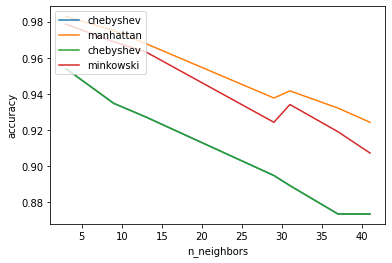

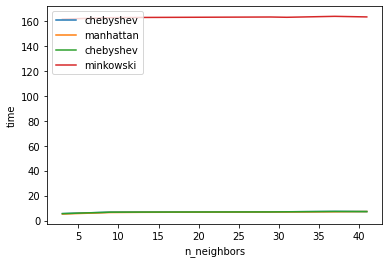

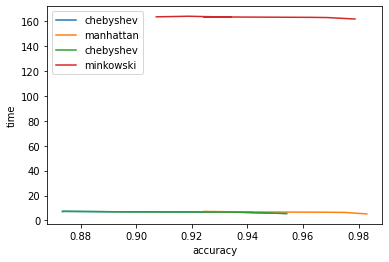

In [ ]:
dfKNN_OvO = pd.DataFrame(accuracy_avgsKNN_OvO)

dfKNN_OvO1 = dfKNN_OvO[dfKNN_OvO[2].isin(["chebyshev"])]
dfKNN_OvO2 = dfKNN_OvO[dfKNN_OvO[2].isin(["manhattan"])]
dfKNN_OvO3 = dfKNN_OvO[dfKNN_OvO[2].isin(["chebyshev"])]
dfKNN_OvO4 = dfKNN_OvO[dfKNN_OvO[2].isin(["minkowski"])]

KNN_OvO_X1 = dfKNN_OvO1.iloc[:, [0,1,3]].values
KNN_OvO_X2 = dfKNN_OvO2.iloc[:, [0,1,3]].values
KNN_OvO_X3 = dfKNN_OvO3.iloc[:, [0,1,3]].values
KNN_OvO_X4 = dfKNN_OvO4.iloc[:, [0,1,3]].values

plt.plot(KNN_OvO_X1[:,0], KNN_OvO_X1[:, 1], label='chebyshev')
plt.plot(KNN_OvO_X2[:,0], KNN_OvO_X2[:, 1], label='manhattan')
plt.plot(KNN_OvO_X3[:,0], KNN_OvO_X3[:, 1], label='chebyshev')
plt.plot(KNN_OvO_X4[:,0], KNN_OvO_X4[:, 1], label='minkowski')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(KNN_OvO_X1[:,0], KNN_OvO_X1[:, 2], label='chebyshev')
plt.plot(KNN_OvO_X2[:,0], KNN_OvO_X2[:, 2], label='manhattan')
plt.plot(KNN_OvO_X3[:,0], KNN_OvO_X3[:, 2], label='chebyshev')
plt.plot(KNN_OvO_X4[:,0], KNN_OvO_X4[:, 2], label='minkowski')
plt.xlabel('n_neighbors')
plt.ylabel('time')
plt.legend(loc='upper left')
plt.show()

plt.plot(KNN_OvO_X1[:,1], KNN_OvO_X1[:, 2], label='chebyshev')
plt.plot(KNN_OvO_X2[:,1], KNN_OvO_X2[:, 2], label='manhattan')
plt.plot(KNN_OvO_X3[:,1], KNN_OvO_X3[:, 2], label='chebyshev')
plt.plot(KNN_OvO_X4[:,1], KNN_OvO_X4[:, 2], label='minkowski')
plt.xlabel('accuracy')
plt.ylabel('time')
plt.legend(loc='upper left')
plt.show()

KNN OvR

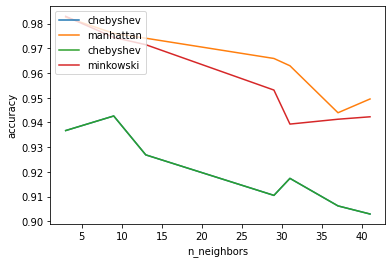

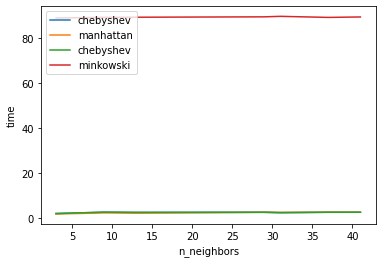

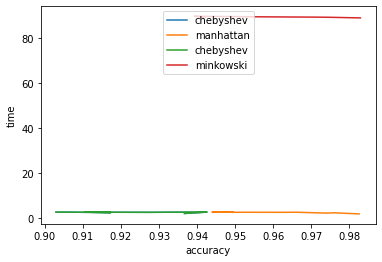

In [ ]:
dfKNN_OvR = pd.DataFrame(accuracy_avgsKNN_OvR)

dfKNN_OvR1 = dfKNN_OvR[dfKNN_OvR[2].isin(["chebyshev"])]
dfKNN_OvR2 = dfKNN_OvR[dfKNN_OvR[2].isin(["manhattan"])]
dfKNN_OvR3 = dfKNN_OvR[dfKNN_OvR[2].isin(["chebyshev"])]
dfKNN_OvR4 = dfKNN_OvR[dfKNN_OvR[2].isin(["minkowski"])]

KNN_OvR_X1 = dfKNN_OvR1.iloc[:, [0,1,3]].values
KNN_OvR_X2 = dfKNN_OvR2.iloc[:, [0,1,3]].values
KNN_OvR_X3 = dfKNN_OvR3.iloc[:, [0,1,3]].values
KNN_OvR_X4 = dfKNN_OvR4.iloc[:, [0,1,3]].values

plt.plot(KNN_OvR_X1[:,0], KNN_OvR_X1[:, 1], label='chebyshev')
plt.plot(KNN_OvR_X2[:,0], KNN_OvR_X2[:, 1], label='manhattan')
plt.plot(KNN_OvR_X3[:,0], KNN_OvR_X3[:, 1], label='chebyshev')
plt.plot(KNN_OvR_X4[:,0], KNN_OvR_X4[:, 1], label='minkowski')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(KNN_OvR_X1[:,0], KNN_OvR_X1[:, 2], label='chebyshev')
plt.plot(KNN_OvR_X2[:,0], KNN_OvR_X2[:, 2], label='manhattan')
plt.plot(KNN_OvR_X3[:,0], KNN_OvR_X3[:, 2], label='chebyshev')
plt.plot(KNN_OvR_X4[:,0], KNN_OvR_X4[:, 2], label='minkowski')
plt.xlabel('n_neighbors')
plt.ylabel('time')
plt.legend(loc='upper left')
plt.show()

plt.plot(KNN_OvR_X1[:,1], KNN_OvR_X1[:, 2], label='chebyshev')
plt.plot(KNN_OvR_X2[:,1], KNN_OvR_X2[:, 2], label='manhattan')
plt.plot(KNN_OvR_X3[:,1], KNN_OvR_X3[:, 2], label='chebyshev')
plt.plot(KNN_OvR_X4[:,1], KNN_OvR_X4[:, 2], label='minkowski')
plt.xlabel('accuracy')
plt.ylabel('time')
plt.legend(loc='upper center')
plt.show()

SVM OvO

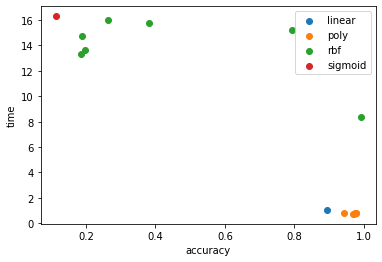

In [ ]:
dfSVM_OvO = pd.DataFrame(accuracy_avgsSVM_OvO)

dfSVM_OvO1 = dfSVM_OvO[dfSVM_OvO[1].isin(["linear"])]
dfSVM_OvO2 = dfSVM_OvO[dfSVM_OvO[1].isin(["poly"])]
dfSVM_OvO3 = dfSVM_OvO[dfSVM_OvO[1].isin(["rbf"])]
dfSVM_OvO4 = dfSVM_OvO[dfSVM_OvO[1].isin(["sigmoid"])]

SVM_OvO_X1 = dfSVM_OvO1.iloc[:, [0,2]].values
SVM_OvO_X2 = dfSVM_OvO2.iloc[:, [0,2]].values
SVM_OvO_X3 = dfSVM_OvO3.iloc[:, [0,2]].values
SVM_OvO_X4 = dfSVM_OvO4.iloc[:, [0,2]].values

plt.scatter(SVM_OvO_X1[:,0], SVM_OvO_X1[:, 1], label='linear')
plt.scatter(SVM_OvO_X2[:,0], SVM_OvO_X2[:, 1], label='poly')
plt.scatter(SVM_OvO_X3[:,0], SVM_OvO_X3[:, 1], label='rbf')
plt.scatter(SVM_OvO_X4[:,0], SVM_OvO_X4[:, 1], label='sigmoid')
plt.xlabel('accuracy')
plt.ylabel('time')
plt.legend(loc='upper right')
plt.show()

SVM OvR

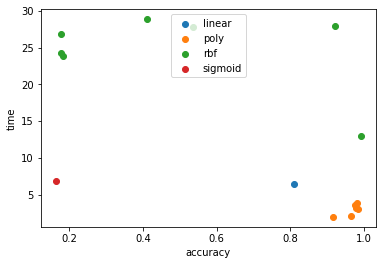

In [ ]:
dfSVM_OvR = pd.DataFrame(accuracy_avgsSVM_OvR)

dfSVM_OvR1 = dfSVM_OvR[dfSVM_OvR[1].isin(["linear"])]
dfSVM_OvR2 = dfSVM_OvR[dfSVM_OvR[1].isin(["poly"])]
dfSVM_OvR3 = dfSVM_OvR[dfSVM_OvR[1].isin(["rbf"])]
dfSVM_OvR4 = dfSVM_OvR[dfSVM_OvR[1].isin(["sigmoid"])]

SVM_OvR_X1 = dfSVM_OvR1.iloc[:, [0,2]].values
SVM_OvR_X2 = dfSVM_OvR2.iloc[:, [0,2]].values
SVM_OvR_X3 = dfSVM_OvR3.iloc[:, [0,2]].values
SVM_OvR_X4 = dfSVM_OvR4.iloc[:, [0,2]].values

plt.scatter(SVM_OvR_X1[:,0], SVM_OvR_X1[:, 1], label='linear')
plt.scatter(SVM_OvR_X2[:,0], SVM_OvR_X2[:, 1], label='poly')
plt.scatter(SVM_OvR_X3[:,0], SVM_OvR_X3[:, 1], label='rbf')
plt.scatter(SVM_OvR_X4[:,0], SVM_OvR_X4[:, 1], label='sigmoid')
plt.xlabel('accuracy')
plt.ylabel('time')
plt.legend(loc='upper center')
plt.show()

MLP

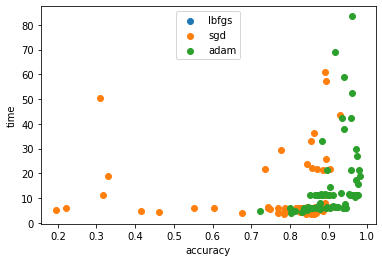

In [ ]:
dfMLP = pd.DataFrame(accuracy_avgsMLP)

dfMLP1 = dfMLP[dfMLP[1].isin(["lbfgs"])]
dfMLP2 = dfMLP[dfMLP[1].isin(["sgd"])]
dfMLP3 = dfMLP[dfMLP[1].isin(["adam"])]

MLP_X1 = dfMLP1.iloc[:, [0,2]].values
MLP_X2 = dfMLP2.iloc[:, [0,2]].values
MLP_X3 = dfMLP3.iloc[:, [0,2]].values

plt.scatter(MLP_X1[:,0], MLP_X1[:, 1], label='lbfgs')
plt.scatter(MLP_X2[:,0], MLP_X2[:, 1], label='sgd')
plt.scatter(MLP_X3[:,0], MLP_X3[:, 1], label='adam')
plt.xlabel('accuracy')
plt.ylabel('time')
plt.legend(loc='upper center')
plt.show()

PCA

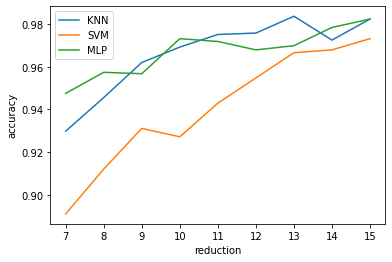

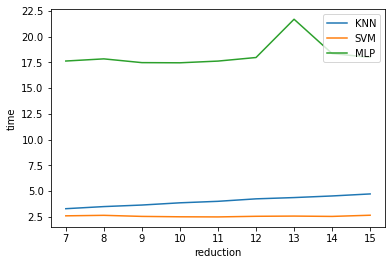

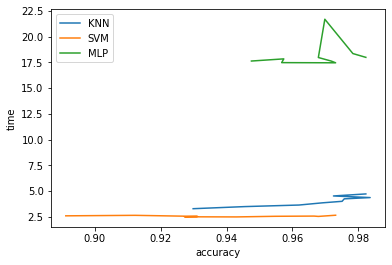

In [ ]:
dfPCA = pd.DataFrame(accuracy_avgsPCA)

dfPCA1 = dfPCA[dfPCA[2].isin(["KNN"])]
dfPCA2 = dfPCA[dfPCA[2].isin(["SVM"])]
dfPCA3 = dfPCA[dfPCA[2].isin(["MLP"])]

PCA_X1 = dfPCA1.iloc[:, [0,1,3]].values
PCA_X2 = dfPCA2.iloc[:, [0,1,3]].values
PCA_X3 = dfPCA3.iloc[:, [0,1,3]].values

plt.plot(PCA_X1[:,2], PCA_X1[:, 0], label='KNN')
plt.plot(PCA_X2[:,2], PCA_X2[:, 0], label='SVM')
plt.plot(PCA_X3[:,2], PCA_X3[:, 0], label='MLP')
plt.xlabel('reduction')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(PCA_X1[:,2], PCA_X1[:, 1], label='KNN')
plt.plot(PCA_X2[:,2], PCA_X2[:, 1], label='SVM')
plt.plot(PCA_X3[:,2], PCA_X3[:, 1], label='MLP')
plt.xlabel('reduction')
plt.ylabel('time')
plt.legend(loc='upper right')
plt.show()

plt.plot(PCA_X1[:,0], PCA_X1[:, 1], label='KNN')
plt.plot(PCA_X2[:,0], PCA_X2[:, 1], label='SVM')
plt.plot(PCA_X3[:,0], PCA_X3[:, 1], label='MLP')
plt.xlabel('accuracy')
plt.ylabel('time')
plt.legend(loc='upper left')
plt.show()

# Tabele

Tabele

In [ ]:
print('KNN OvO', end='\n')
print(tabulate(dfKNN_OvO, headers=["n_neighbors", "accuracy", "metric", "time", "strategic", "p"], tablefmt='fancy_grid',
showindex=True))

KNN OvO
╒════╤═══════════════╤════════════╤═══════════╤═══════════╤═════════════╤═════╕
│    │   n_neighbors │   accuracy │ metric    │      time │ strategic   │   p │
╞════╪═══════════════╪════════════╪═══════════╪═══════════╪═════════════╪═════╡
│  0 │             3 │   0.98459  │ euclidean │   6.61607 │ OvO         │   0 │
├────┼───────────────┼────────────┼───────────┼───────────┼─────────────┼─────┤
│  1 │             9 │   0.975082 │ euclidean │   7.67351 │ OvO         │   0 │
├────┼───────────────┼────────────┼───────────┼───────────┼─────────────┼─────┤
│  2 │            13 │   0.971475 │ euclidean │   7.81555 │ OvO         │   0 │
├────┼───────────────┼────────────┼───────────┼───────────┼─────────────┼─────┤
│  3 │            29 │   0.93377  │ euclidean │   8.23962 │ OvO         │   0 │
├────┼───────────────┼────────────┼───────────┼───────────┼─────────────┼─────┤
│  4 │            31 │   0.936066 │ euclidean │   8.28295 │ OvO         │   0 │
├────┼───────────────┼──────────

In [ ]:
print('KNN OvR', end='\n')
print(tabulate(dfKNN_OvR, headers=["n_neighbors", "accuracy", "metric", "time", "strategic", "p"], tablefmt='fancy_grid',
showindex=True))

KNN OvR
╒════╤═══════════════╤════════════╤═══════════╤══════════╤═════════════╤═════╕
│    │   n_neighbors │   accuracy │ metric    │     time │ strategic   │   p │
╞════╪═══════════════╪════════════╪═══════════╪══════════╪═════════════╪═════╡
│  0 │             3 │   0.980984 │ euclidean │  1.68359 │ OvR         │   0 │
├────┼───────────────┼────────────┼───────────┼──────────┼─────────────┼─────┤
│  1 │             9 │   0.978033 │ euclidean │  2.12716 │ OvR         │   0 │
├────┼───────────────┼────────────┼───────────┼──────────┼─────────────┼─────┤
│  2 │            13 │   0.967869 │ euclidean │  2.05361 │ OvR         │   0 │
├────┼───────────────┼────────────┼───────────┼──────────┼─────────────┼─────┤
│  3 │            29 │   0.954098 │ euclidean │  2.22189 │ OvR         │   0 │
├────┼───────────────┼────────────┼───────────┼──────────┼─────────────┼─────┤
│  4 │            31 │   0.950164 │ euclidean │  2.16233 │ OvR         │   0 │
├────┼───────────────┼────────────┼─────────

In [ ]:
print('SVM OvO', end='\n')
print(tabulate(dfSVM_OvO, headers=["accuracy", "kernel", "time", "strategic", "gamma", "degree"], tablefmt='fancy_grid',
showindex=True))

SVM OvO
╒════╤════════════╤══════════╤═══════════╤═════════════╤═════════╤══════════╕
│    │   accuracy │ kernel   │      time │ strategic   │   gamma │   degree │
╞════╪════════════╪══════════╪═══════════╪═════════════╪═════════╪══════════╡
│  0 │   0.89377  │ linear   │  1.05943  │ OvO         │     0   │        0 │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────┼──────────┤
│  1 │   0.941639 │ poly     │  0.843715 │ OvO         │     0   │        2 │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────┼──────────┤
│  2 │   0.976066 │ poly     │  0.785237 │ OvO         │     0   │        3 │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────┼──────────┤
│  3 │   0.978361 │ poly     │  0.818008 │ OvO         │     0   │        4 │
├────┼────────────┼──────────┼───────────┼─────────────┼─────────┼──────────┤
│  4 │   0.97377  │ poly     │  0.818929 │ OvO         │     0   │        5 │
├────┼────────────┼──────────┼───────────┼─────────────┼

In [ ]:
print('SVM OvR', end='\n')
print(tabulate(dfSVM_OvR, headers=["accuracy", "kernel", "time", "strategic", "gamma", "degree"], tablefmt='fancy_grid',
showindex=True))

SVM OvR
╒════╤════════════╤══════════╤══════════╤═════════════╤═════════╤══════════╕
│    │   accuracy │ kernel   │     time │ strategic   │   gamma │   degree │
╞════╪════════════╪══════════╪══════════╪═════════════╪═════════╪══════════╡
│  0 │   0.809836 │ linear   │  6.38515 │ OvR         │     0   │        0 │
├────┼────────────┼──────────┼──────────┼─────────────┼─────────┼──────────┤
│  1 │   0.917705 │ poly     │  1.95603 │ OvR         │     0   │        2 │
├────┼────────────┼──────────┼──────────┼─────────────┼─────────┼──────────┤
│  2 │   0.965246 │ poly     │  2.0666  │ OvR         │     0   │        3 │
├────┼────────────┼──────────┼──────────┼─────────────┼─────────┼──────────┤
│  3 │   0.985246 │ poly     │  3.07972 │ OvR         │     0   │        4 │
├────┼────────────┼──────────┼──────────┼─────────────┼─────────┼──────────┤
│  4 │   0.981639 │ poly     │  3.82229 │ OvR         │     0   │        5 │
├────┼────────────┼──────────┼──────────┼─────────────┼─────────┼───

In [ ]:
print('MLP', end='\n')
print(tabulate(dfMLP, headers=["accuracy", "solver", "time", "layer", "dense", "activation"], tablefmt='fancy_grid',
showindex=True))

MLP
╒═════╤════════════╤══════════╤══════════╤═════════╤═════════╤══════════════╕
│     │   accuracy │ solver   │     time │   layer │   dense │ activation   │
╞═════╪════════════╪══════════╪══════════╪═════════╪═════════╪══════════════╡
│   0 │   0.841967 │ sgd      │  3.65871 │      20 │       1 │ relu         │
├─────┼────────────┼──────────┼──────────┼─────────┼─────────┼──────────────┤
│   1 │   0.785574 │ sgd      │  3.70618 │      20 │       2 │ relu         │
├─────┼────────────┼──────────┼──────────┼─────────┼─────────┼──────────────┤
│   2 │   0.744262 │ sgd      │  6.02422 │      20 │       3 │ relu         │
├─────┼────────────┼──────────┼──────────┼─────────┼─────────┼──────────────┤
│   3 │   0.854426 │ sgd      │  3.60112 │      50 │       1 │ relu         │
├─────┼────────────┼──────────┼──────────┼─────────┼─────────┼──────────────┤
│   4 │   0.838033 │ sgd      │  5.92186 │      50 │       2 │ relu         │
├─────┼────────────┼──────────┼──────────┼─────────┼────────

In [ ]:
print('PCA', end='\n')
print(tabulate(dfPCA, headers=["accuracy", "time", "method", "reduction"], tablefmt='fancy_grid',
showindex=True))

PCA
╒════╤════════════╤══════════╤══════════╤═════════════╕
│    │   accuracy │     time │ method   │   reduction │
╞════╪════════════╪══════════╪══════════╪═════════════╡
│  0 │   0.929836 │  3.28247 │ KNN      │           7 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  1 │   0.891148 │  2.5893  │ SVM      │           7 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  2 │   0.947541 │ 17.6319  │ MLP      │           7 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  3 │   0.945574 │  3.48744 │ KNN      │           8 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  4 │   0.912131 │  2.63766 │ SVM      │           8 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  5 │   0.957377 │ 17.8416  │ MLP      │           8 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  6 │   0.961967 │  3.63809 │ KNN      │           9 │
├────┼────────────┼──────────┼──────────┼─────────────┤
│  7 │   0.931148 │  2.53365 │ SVM      │   

# Wykresy regionów decyzyjnych

Wykresy regionów decyzyjnych

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


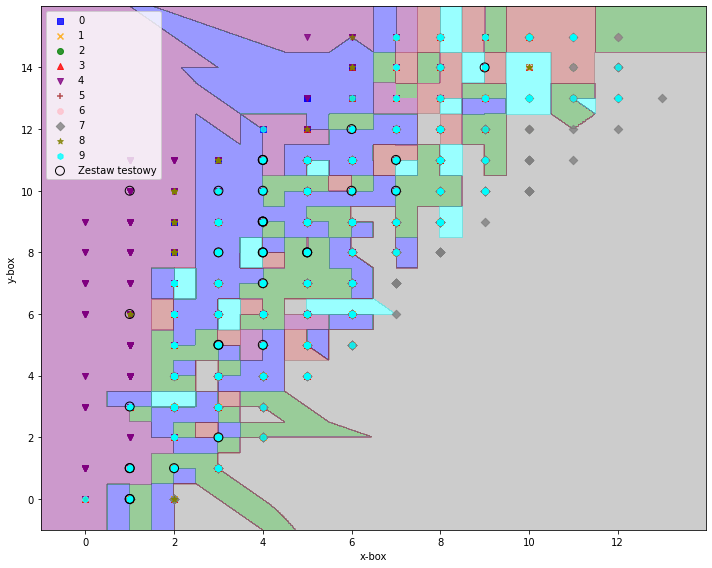

In [ ]:
plt.figure(figsize=(10,8))
knn_C.fit(training_[:,[0,1]], training_classes_)
plot_decision_regions(X_combined, y_combined, classifier=knn_C, test_idx=range(120,150))

plt.xlabel('x-box')
plt.ylabel('y-box')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


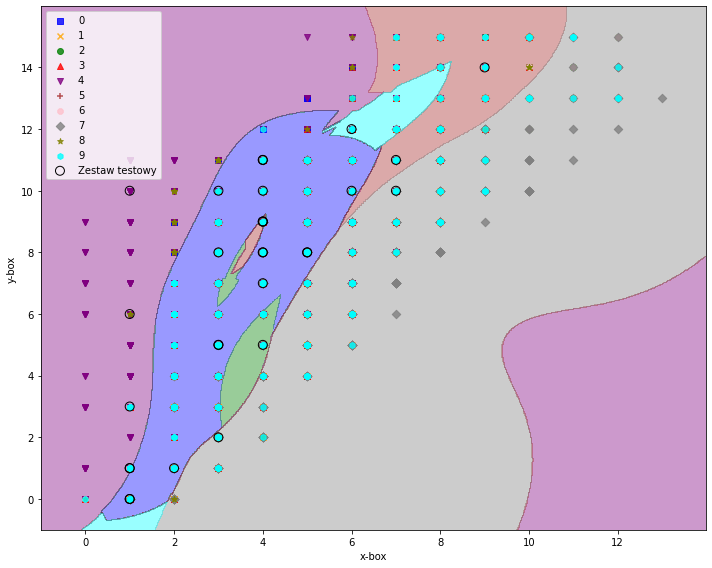

In [ ]:
plt.figure(figsize=(10,8))
svm_C.fit(training_[:,[0,1]], training_classes_)
plot_decision_regions(X_combined, y_combined, classifier=svm_C, test_idx=range(120,150))

plt.xlabel('x-box')
plt.ylabel('y-box')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Wykresy regionów decyzyjnych po PCA

Wykresy regionów decyzyjnych po PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


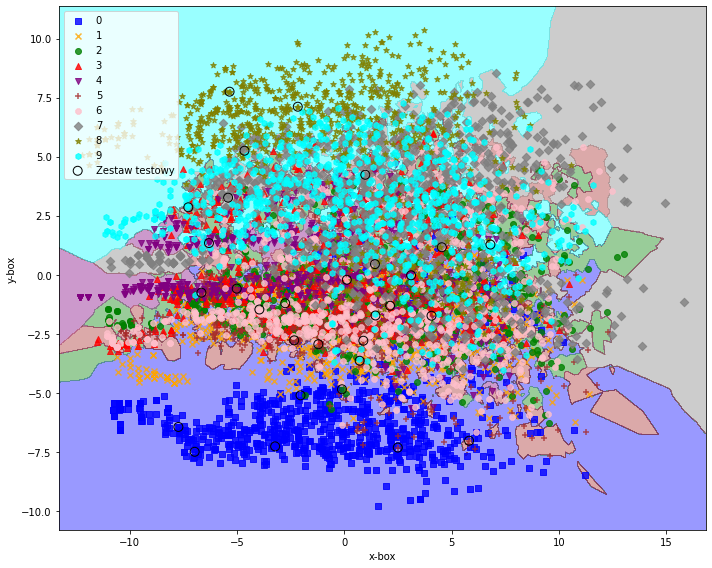

In [ ]:
plt.figure(figsize=(10,8))
knn_C_r.fit(training_r[:,[0,1]], training_classes_r)
plot_decision_regions(X_combined_r, y_combined_r, classifier=knn_C_r, test_idx=range(120,150))

plt.xlabel('x-box')
plt.ylabel('y-box')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


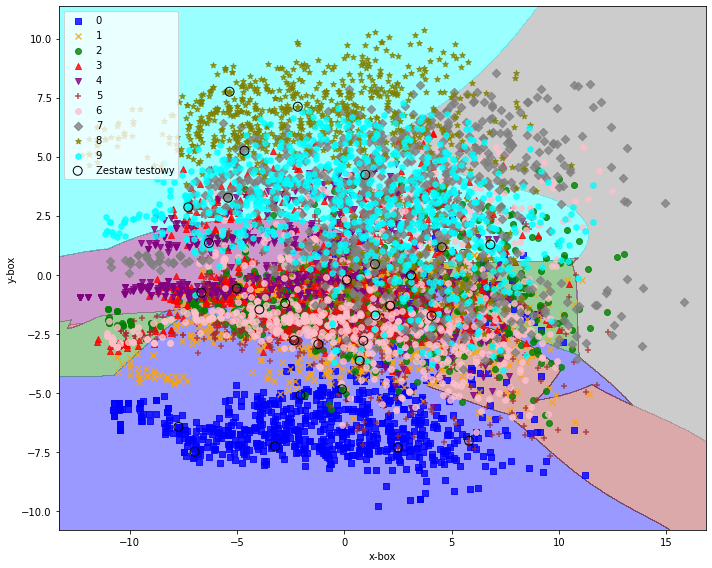

In [ ]:
plt.figure(figsize=(10,8))
svm_C_r.fit(training_r[:,[0,1]], training_classes_r)
plot_decision_regions(X_combined_r, y_combined_r, classifier=svm_C_r, test_idx=range(120,150))

plt.xlabel('x-box')
plt.ylabel('y-box')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Zapisanie do pliku w formacie HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/Zaawansowane_metody_sztucznej_inteligencji_projekt_grupowy.ipynb

[NbConvertApp] Converting notebook /content/Zaawansowane_metody_sztucznej_inteligencji_projekt_grupowy.ipynb to html
[NbConvertApp] Writing 2135034 bytes to /content/Zaawansowane_metody_sztucznej_inteligencji_projekt_grupowy.html
